In [69]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa

Sample rate of the audio file:  8000


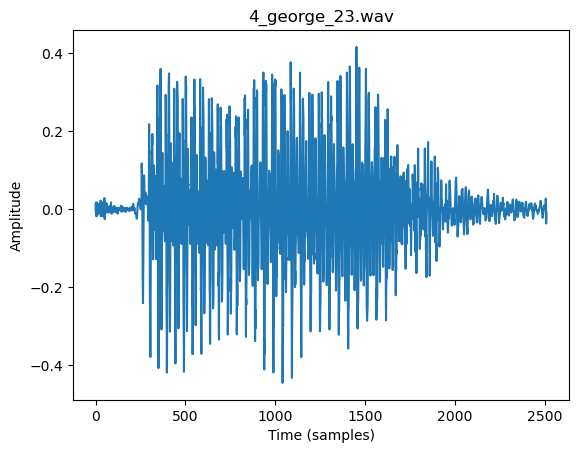

In [70]:
#folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [96]:
def pad_segment(s, window_size):
    dif_sample = abs(len(s) - window_size) # Calculate the differnce in desired signal length and the current signal length

    if len(s) % 2 != 0:
        padded_y = np.pad(s, (dif_sample//2, dif_sample//2 + 1), 'constant', constant_values=(0, 0))
    else:
        padded_y = np.pad(s, (dif_sample//2, dif_sample//2), 'constant', constant_values=(0, 0))

    return padded_y



def stft(x, frame_size=256, overlap=128):
    num_segments = len(x) // overlap + 1 # Calculate the number of segments
    freq_bins = frame_size // 2 + 1 # Define the number of frequency bins
    spec = np.zeros((freq_bins, num_segments))
    t = 0
    for i in range(0, len(x), overlap):
        seg = x[i:i+frame_size]
        seg = np.hamming(len(seg)) * seg # Apply the hamming window
        if len(seg) < frame_size: # if the segment is shorter than the window size, we need to pad it (usually the last segment)
            seg = pad_segment(seg, frame_size)
        spec[:,t] = np.abs(np.fft.rfft(seg, n=frame_size)) #Compute the magnitude of frequency components
        t += 1
    return spec

In [97]:
# y = pad_segment(y, 6457)

In [98]:
result = stft(y)


In [99]:
result[-10]

array([0.02674893, 0.10033369, 0.27581242, 0.10764768, 0.17857958,
       0.13027789, 0.04415973, 0.17113058, 0.05233451, 0.06588159,
       0.01504099, 0.11110689, 0.01814229, 0.18683844, 0.04761998,
       0.03208516, 0.00917656, 0.01240867, 0.00341954, 0.00321374])

In [100]:
epsilon = 1e-4
spec_db = np.array(20 * np.log10(result + epsilon))

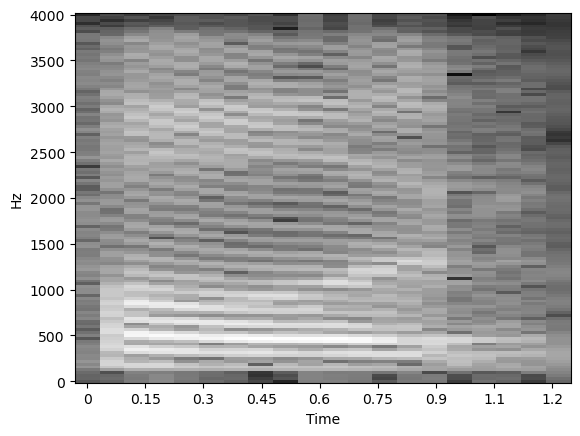

In [101]:
spec_db
img = librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='linear', fmax = sr//2, fmin=0, cmap='gray')

In [102]:
num_segments = (len(y) ) / 128
num_segments

19.6171875

In [103]:
print(len(np.fft.rfftfreq(n=256, d=1/8000)))

129


In [104]:
np.fft.rfftfreq(n=256, d=1/8000)

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

In [105]:
def istft(spec):
    frame_size = (spec.shape[0] - 1) * 2
    for i in range(spec.shape[1]):
        if i == 0:
            y = np.fft.irfft(spec[:,i])
            y = y/np.hamming(frame_size)
        else:

            y = np.concatenate((y, np.fft.irfft(spec[:,i])/np.hamming(frame_size)))
    return y

In [106]:
inverse_result = istft(result)
print(inverse_result)

[ 0.51264137  0.06968044 -0.06428903 ...  0.09710946  0.13983637
  0.227599  ]


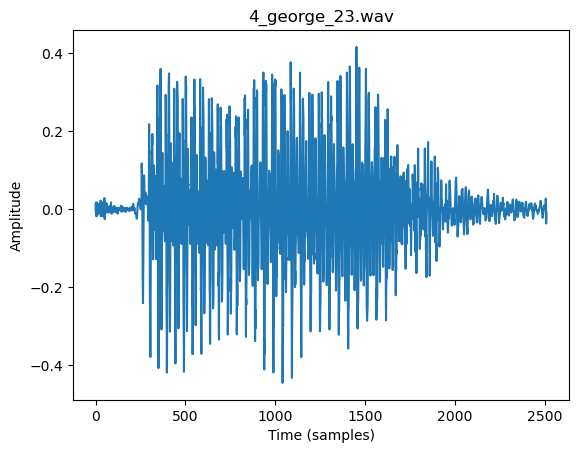

In [107]:
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [108]:
output_path = "output.wav"
soundfile.write(output_path, y, sr)
print(f"Exported y as WAV file to {output_path}")

Exported y as WAV file to output.wav
